<a href="https://colab.research.google.com/github/PaoloBarba/ADM_HW2-Group18/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Methods of Data Mining**

#Academic year 2022–2023

# Homework 2 - Instagram Profiles & Posts

Authors: Barba Paolo, Bellaroba Albachiara, Soukaina Alaoui, Navid

#Import the packages and upload datasets


In [ ]:
import pandas as pd
#import functions as fc
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     


In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
locations =pd.read_csv('/content/drive/MyDrive/ADM_HW2/instagram_locations.csv',sep='\t')
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t')
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',nrows=100000)
#print(posts)

#Research question 1 Exploratory Data Analysis
## Data summaritation

In order to do an explanatory data analysis we will go through three different steps: Data Explorations, Data Manipulations and Data Summaritation.
First we will show the firsts rows of the datasets we are analysing.


In [ ]:
locations.head()

In [ ]:
profiles.head()

In [ ]:
posts.head()

Now we can look at the columns of our datasets in order to understand which variables we are analsing.
First of all we are going to first an info into the dataset to quickly understand the variables we are working with, get the numbers of rows and 
columns we have for each dataset

In [ ]:
locations.info()

In [ ]:
profiles.info()

In [ ]:
posts.info()

In [ ]:
print("Locations dataframe has " + str(locations.shape[0]) + " observations and "  + str(locations.shape[1]) + " variables")
print("Profiles dataframe has " + str(profiles.shape[0]) + " observations and "  + str(profiles.shape[1]) + " variables")
print("Posts dataframe has " + str(posts.shape[0]) + " observations and "  + str(posts.shape[1]) + " variables")

We are going one step further, having a better understanding of the statistical properties of these dataframes by using describe method that give us basics statistics of all the numerical columns we have.We are doing a statistical summaritation at all the numeric variables that have sense to summarize

In [ ]:
profiles[["following" , "followers" , "n_posts" ]].describe()

,following,followers,n_posts
count,3.452771e+06,3.452771e+06,3.452771e+06
mean,1.405641e+03,4.739899e+03,4.095414e+02
std,8.113473e+03,1.939087e+05,1.041940e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e+02,1.590000e+02,2.200000e+01
50%,7.540000e+02,4.060000e+02,1.200000e+02
75%,1.573000e+03,9.740000e+02,4.200000e+02
max,4.191080e+06,2.854576e+08,1.837300e+05


In [ ]:
posts[["numbr_likes","number_comments"]].describe()

,numbr_likes,number_comments
count,100000.000000,100000.000000
mean,325.856710,7.582170
std,5512.736285,124.782766
min,0.000000,0.000000
25%,20.000000,0.000000
50%,48.000000,2.000000
75%,126.000000,5.000000
max,852230.000000,31655.000000


We can see for istance that the maximum is too far from the 75% percentile, this sounds as an error that can influence a lot the statistics.
In order to do a better analysis we might clean the datasets as much as possible doing steps descibed as below. 


1.   **Dealing with duplicates rows**:
      we drop every duplicates rows because contengono useless informations 
2.    **Dealing with missing values**:
      we check the percentage of missing value in each columns, we drop a columns that contains missing values over a set trheshold. After we select some columns of interest and drop the NA (gli darò una spiegazione per sto motivo giuro :D)

3. **Dealing with outliers:** It is risky to include outliers in data driven models For some variables of interest we actually have some mistyping or error data that influence so much the distribution, we want to eliminate them according to z-scores ( glie spiego pure questo tranqui  :p ). 



In [ ]:
#Duplicates rows
profiles.drop_duplicates(inplace=True)
posts.drop_duplicates(inplace=True)
locations.drop_duplicates(inplace=True)

In [ ]:
#Dealing with missing values, columns that contains so much Na
#check for null values / % of null values we have
print('Null values percentage for locations dataset')
print(locations.isnull().sum()/locations.shape[0])
print('\n')
print('Null values percentage for profiles dataset')
print(profiles.isnull().sum()/profiles.shape[0])
print('\n')
print('Null values percentage for posts dataset')
print(posts.isnull().sum()/posts.shape[0])

Null values percentage for locations dataset
sid                       0.000000
id                        0.000000
name                      0.000000
street                    0.300153
zip                       0.300275
city                      0.083598
region                    0.998279
cd                        0.081795
phone                     0.411643
aj_exact_city_match       0.021657
aj_exact_country_match    0.021657
blurb                     0.602306
dir_city_id               0.515285
dir_city_name             0.515285
dir_city_slug             0.515751
dir_country_id            0.515353
dir_country_name          0.515285
lat                       0.006026
lng                       0.006026
primary_alias_on_fb       0.583897
slug                      0.079196
website                   0.390547
cts                       0.000000
dtype: float64


Null values percentage for profiles dataset
sid                    0.000000
profile_id             0.007195
profile_name           0.

In [ ]:
#remove null colums over the threshold
profiles.dropna(thresh = len(profiles)*.6, axis=1)
locations.dropna(thresh = len(locations)*.6, axis=1)

Let's have a look at the distributions of some variables of interest 

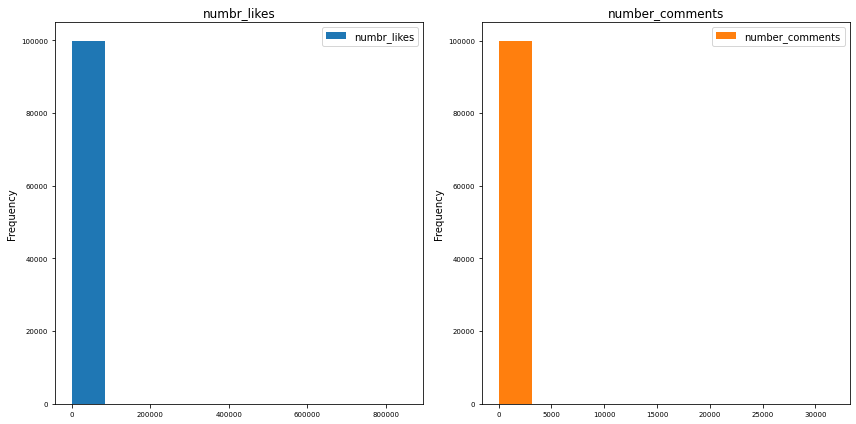

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
axes = axes.ravel() 
cols = ["numbr_likes", "number_comments"]  
colors = ['tab:blue', 'tab:orange']  

for col, color, ax in zip(cols, colors, axes):
    posts[col].plot(kind= 'hist', ax=ax, color=color, label=col, title=col,grid=False,fontsize=7)
    ax.legend()
fig.tight_layout()
plt.show()

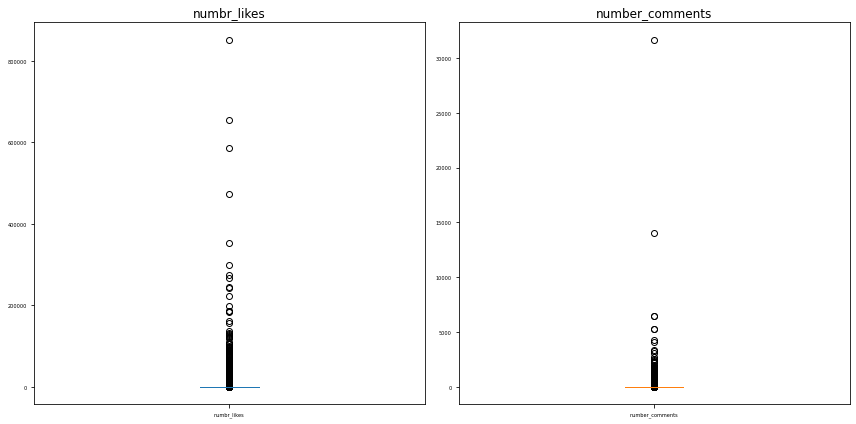

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
axes = axes.ravel() 
cols = ["numbr_likes", "number_comments"]  
colors = ['tab:blue', 'tab:orange']  

for col, color, ax in zip(cols, colors, axes):
    posts[col].plot(kind= 'box', ax=ax, color=color, label=col, title=col,grid=False,fontsize=5)
fig.tight_layout()
plt.show()

These distributions are sintomo di errors during the phase of raccolta dati:
So for these variables of interest we have to deal with Na and ouliers values.
So for Na values we have more than optzion to do.
Replace with the mean: if there are a lot of missing value we are concentrando the distribution in the mean value and we lose informations about the shape of the distributions (that's a shit).
Drop Na: we are loosing a relevant percentage of the informations we have, by the way having a huge quantità of data, this don't influence so much the distrubtion we are anylising. So in this case we will go through this procedure :D.

In [ ]:
posts.dropna(subset=['numbr_likes', 'number_comments'])

The existence of one single misleading value has the potential to change the conclusion implied by the model. Is is therefore, important to detect and then decide whether to remove it or not from the dataset. Sometimes the data point may be extremely high or low but that does not mean it is an outlier that we want to get rid of.
We have more than one method to dedect outliers:
Inter Quartile Range : IQR. IQR = Q3-Q1 we use only 50% of the data!!!
Z-score:Z-score is just another form of standard deviation procedure. Z-score is used to convert the data into another dataset with mean = 0.

In [ ]:
mean_n_comments = np.mean(posts.number_comments)
s_n_comments = np.std(posts.number_comments)
posts['Z-score_comments'] = (posts.number_comments - mean_n_comments)/ s_n_comments


mean_n_likes = np.mean(posts.numbr_likes)
s_n_likes = np.std(posts.numbr_likes)
posts['Z-score_likes'] = (posts.numbr_likes - mean_n_likes)/ s_n_likes



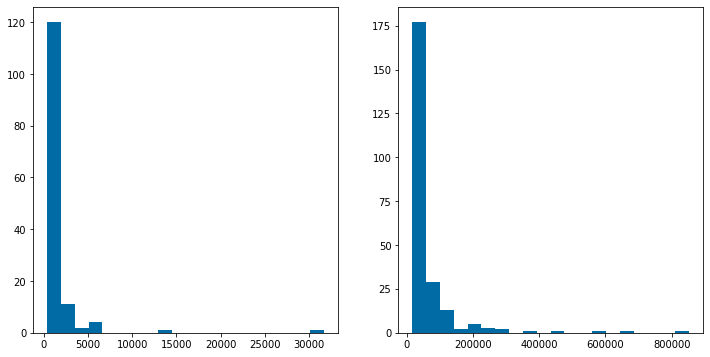

In [ ]:
plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
plt.subplot(121)
plt.hist(posts.number_comments[abs(posts['Z-score_comments']) > 3],bins=20)
plt.subplot(122)
plt.hist(posts.numbr_likes[abs(posts['Z-score_likes']) > 3],bins=20)
plt.show()

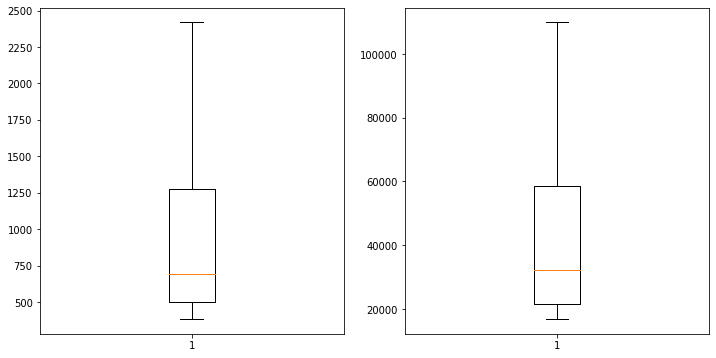

In [ ]:
plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  
plt.subplot(121)
plt.boxplot(posts.number_comments[abs(posts['Z-score_comments']) > 3],showfliers= False)
plt.subplot(122)
plt.boxplot(posts.numbr_likes[abs(posts['Z-score_likes']) > 3], showfliers= False)
plt.show()

In [ ]:
data_outliers= profiles[(profiles.followers) < profiles.followers.quantile(0.95)]
data_outliers= data_outliers[(profiles.followers) > profiles.followers.quantile(0.05)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


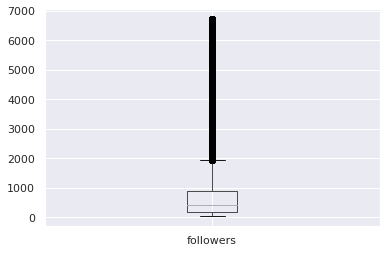

In [ ]:
data_outliers.boxplot('followers')
plt.show()
#the distributions is quite skwnedss
#showfliers= false

In [ ]:
locations.region.value_count() / locations.regions.notnull().sum()  #give us the percentage of the region

AttributeError: ignored